# Iris Dataset Analysis

##### The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

## Libraries

In [19]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
import pylab
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


Libraries Used:

- pandas An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- numpy Fundamental package for scientific computations in Python
- matplotlib Matplotlib is a plotting library for the Python programming language
- sklearn A machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines,KNeighborsClassifier,LinearSVC
- Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.


## The Data

#### The columns in this dataset are:

1. Id

2. SepalLengthCm

3. SepalWidthCm

4. PetalLengthCm

5. PetalWidthCm

6. Species
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica 

## Loading the Dataset

In [20]:
data = pd.read_csv("/home/manaswi/Desktop/Data Analysis Projects/Iris Data Analysis/Iris.csv", header = 0)
#reset index
data = data.reset_index()
data.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
species_list = list(data["Species"].unique())
print("Types of species: %s\n" % species_list)

print("Dataset length: %i\n" % len(data))

print("Sepal length range: [%s, %s]" % (min(data["SepalLengthCm"]), max(data["SepalLengthCm"])))
print("Sepal width range:  [%s, %s]" % (min(data["SepalWidthCm"]), max(data["SepalLengthCm"])))
print("Petal length range: [%s, %s]" % (min(data["PetalLengthCm"]), max(data["PetalLengthCm"])))
print("Petal width range:  [%s, %s]\n" % (min(data["PetalWidthCm"]), max(data["PetalWidthCm"])))

print("Sepal length variance:\t %f" % np.var(data["SepalLengthCm"]))
print("Sepal width variance: \t %f" % np.var(data["SepalWidthCm"]))
print("Petal length variance:\t %f" % np.var(data["PetalLengthCm"]))
print("Petal width variance: \t %f\n" % np.var(data["PetalWidthCm"]))

print("Sepal length stddev:\t %f" % np.std(data["SepalLengthCm"]))
print("Sepal width stddev: \t %f" % np.std(data["SepalWidthCm"]))
print("Petal length stddev:\t %f" % np.std(data["PetalLengthCm"]))
print("Petal width stddev: \t %f\n" % np.std(data["PetalWidthCm"]))

print("Data describe\n---")
print(data[data.columns[2:]].describe())


Types of species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Dataset length: 150

Sepal length range: [4.3, 7.9]
Sepal width range:  [2.0, 7.9]
Petal length range: [1.0, 6.9]
Petal width range:  [0.1, 2.5]

Sepal length variance:	 0.681122
Sepal width variance: 	 0.186751
Petal length variance:	 3.092425
Petal width variance: 	 0.578532

Sepal length stddev:	 0.825301
Sepal width stddev: 	 0.432147
Petal length stddev:	 1.758529
Petal width stddev: 	 0.760613

Data describe
---
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.8


## Presenting the Summary Statistics a more readable way



In [22]:
# DataFrame.describe: Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

summary = data.describe()
summary = summary.transpose()
summary.head()


,count,mean,std,min,25%,50%,75%,max
index,150.0,74.500000,43.445368,0.0,37.25,74.50,111.75,149.0
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9


## Data Visualization

### Histogram for petal length, petal width, sepal length, sepal width

Text(0.5, 0.98, 'Analyzing distribution for the series')

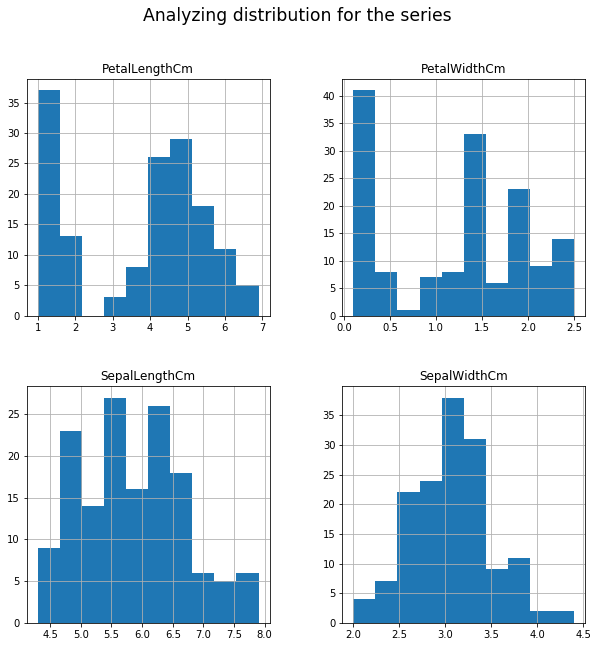

In [23]:
data.hist(
    column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")


### Heatmap for each feature

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,NaN,NaN,NaN
SepalWidthCm,-0.109369,1.000000,NaN,NaN
PetalLengthCm,0.871754,-0.420516,1.000000,NaN
PetalWidthCm,0.817954,-0.356544,0.962757,1.0


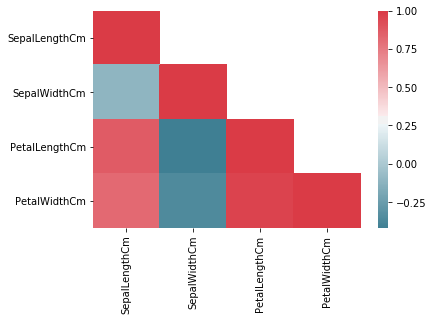

In [24]:
dt = data[data.columns[2:]]

# method : {‘pearson’, ‘kendall’, ‘spearman’}
corr = dt.corr(method="pearson") #returns a dataframe, so it can be reused

# eliminate upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)
# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

### Interpretation

#### Diagonal values and upper triangle are ignored (melted the upper triangle through np.tril and df.where).
#### Naturally, we find:

   - a high positive correlation between PetalWidth and PetalLength (0.96)
   - a high positive correlation between PetalLength and SepalLength (0.87)
   - a high positive correlation between PetalWidth and SepalLength (0.81)

#### We observe that the correlations between these main attributes: PetalWidth, PetalLength and SepalLength.

   - 1 is total positive linear correlation
   - 0 is no linear correlation
   - −1 is total negative linear correlation



### Scatterplots for the correlating pairs

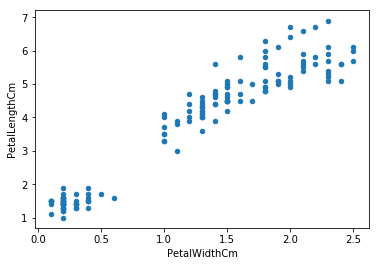

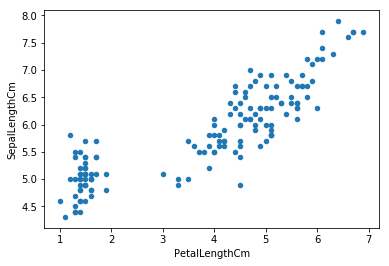

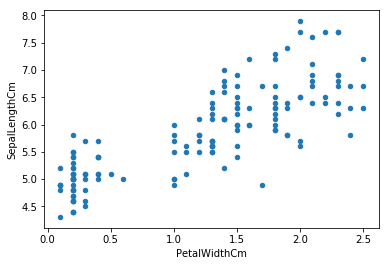

In [25]:
'''fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [data["PetalWidthCm"], data["PetalLengthCm"]]
n = 100
ax.scatter(data["PetalWidthCm"], data["PetalLengthCm"], data["SepalLengthCm"])


ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('SepalLengthCm')

plt.tight_layout(pad=0.5)
plt.show()'''

dt.plot(kind='scatter', x='PetalWidthCm', y='PetalLengthCm');
dt.plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm');
dt.plot(kind='scatter', x='PetalWidthCm', y='SepalLengthCm');

The plots above depict the variation of one feature with the other correlating feature

### Barplots for Sepal Length, Sepal Width, Petal Length, Petal Width

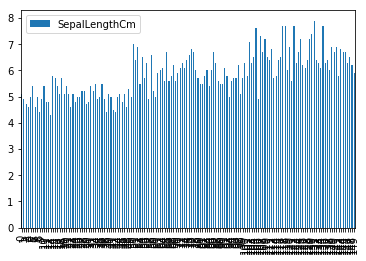

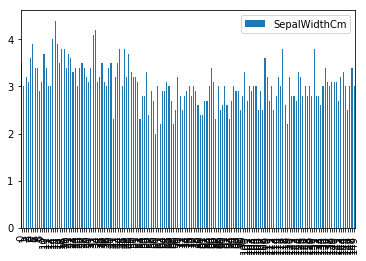

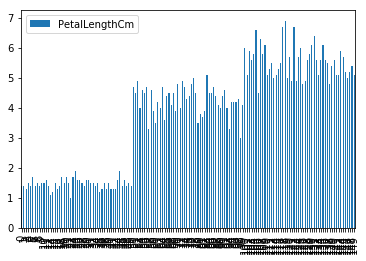

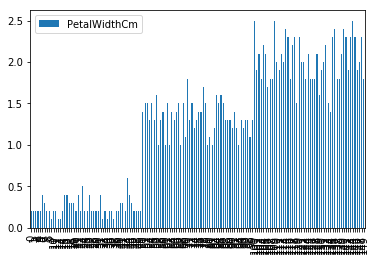

In [26]:
data[data.columns[2:3]].plot.bar()
data[data.columns[3:4]].plot.bar()
data[data.columns[4:5]].plot.bar()
data[data.columns[5:6]].plot.bar()

The plots above depict the variation with the features sepal length, sepal width, petal length, petal width

## Checking the presence of missing values

In [27]:
data.isnull().any()

index            False
Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Checking the presence of duplicate values

In [28]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

## Machine Learning Models

#### Splitting into train and test sets
Now we'll use our trained model to generate predictions for our test data. To see how well our model did, we'll calculate the accuracy by comparing our predicted labels for the test set with the true labels in the test set. Accuracy is the number of correct predictions divided by the total number of predictions.

In [29]:
iris=load_iris()
X= iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

Logistic  Regression  is  a  supervised  machine  learning technique,  employed  in  classification  jobs  (  for  predictions based on training data).Logistic Regression uses an equation similar  to  Linear  Regression  but  the  outcome  of    logistic regression is  a  categorical  variable  whereas  it  is a  value  for other  regression  models.  Binary  outcomes  can  be  predicted from  the  independent  variables.  The  outcome  of  dependent variable   is   discrete.   Logistic   Regression   uses   a   simple equation   which   shows   the   linear   relation   between   the independent  variables.  These  independent  variables  along with  their  coefficients  are  united  linearly  to  form  a  linear equation that is used to predict the output.
The equation used is:

Ln($\frac{\Pi}{(1-\Pi)}$)=a0+a1*x+a2*x

This is called the logistic function.

This algorithm is entitled as logistic regression as the key method  behind  it  is  logistic  function.The  output  can  be predicted  from  the  independent  variables,  which  form  a linear  equation.  The  output  predicted  has  no  restrictions,  it can be any value from negative infinity to positive infinity.But the output required is a class variable (i.e., yes or no, 1  or  0).  So,  the  outcome  of  the  linear  equation  should  be flattened  into  a  small  range  (i.e  [0,1]).Logistic  function  is used  here  to  suppress  the  outcome  value  between  0  and  1. Logistic  function  can  also  be  called sigmoidfunction  or Cost  function.  Logistic  function  is  a  Shaped  curve  which takes  the  input  (numeric  value)  and  changes  it  to  a  value between 0 and 1.Applying  antilog  on  both  sides  of  the  above  equation  gives

y=$\frac{\mathrm{e}^{a0+a1x+a2x}}{(1-\mathrm{e}^{a0+a1x+a2x})}$


In [30]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)


/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9777777777777777

### SVM Model

#### SVM is a supervised machine learning algorithm which can be used for classification or regression problems.
1) It uses Kernel trick

2) It is Optimal margin based classification technique in Machine Learning.

3) Good number of algorithms are proposed which utilizes problem structures and other smaller-smaller things like problem shrinking during optimization etc.

Support Vector Machine is a supervised machine learning algorithm which   is   doing   well   in   pattern   recognition problems  and  it  is  used  as a training algorithm  for  studying classification  and  regression  rules  from  data.SVM  is  most precisely  used  when  the  number  of  features  and  number  of instances  are  high.A  binary  classifier  is  built  by  the  SVM algorithm .  This  binary  classifier  is  constructed  using  a hyper plane where it is a line in more than 3-dimensions.The hyper  plane  does  the  work  of  separating  the  members  into one of the two classes.

Hyper plane of SVM is built on mathematical equations.The equation of hyper plane is WTX=0 which is similar to the line equation y= ax + b. Here W and X represent vectors where   the   vector   W   is   always   normal   to   the   hyper plane.WTX  represents  the  dot  product  of  vectors.  As  SVM deals with the dataset when the number of features are more so,  we need to use the equation WTX=0 in this case instead of using the line equation y= ax + b.If a set of training data is given to the machine, each data item   will   be   assigned   to   one   or   the   other   categorical variables,  a  SVM  training  algorithm  builds  a  model  that plots new data item to one or the other category.  In an SVM model,  each  data  item  is  represented  as  points  in  an  n-dimensional  space  where n  is  the number  of  features  where each  feature  is  represented  as  the  value  of  a  particular coordinate  in  the  n-dimensional  space.  Classification  is carried  out  by  finding  a  hyper-plane  that  divides  the  two-classes proficiently. Later, new data item is mapped into the same space and its category is predicted based on the side of the hyper-plane they turn up.

In [31]:
svm=LinearSVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

### k-Nearest Neighbors Model

##### In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [32]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
#y_pred : the test set predictions
y_pred=knn.predict(X_test)

knn.score(X_test,y_test)


1.0

### Results and Discussion
#### SVM and kNN give the highest accuracy when compared to Logistic Regression algorithm. So, we propose that kNN and SVM are best suited algorithms for this analysis.
